---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [1]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import sys
import sklearn
import visuals as vs # Supplementary code


# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

# 让结果在notebook中显示
%matplotlib inline

In [2]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

In [3]:
#找到并查看要用的数据
in_file = 'housing.csv'
full_data = pd.read_csv(in_file)
display (full_data.head())

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
#将要用的数据提取出来
outcomes_MEDV = full_data['MEDV']
display (outcomes_MEDV.head())

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

## 个人批注：pandas为我们提供了非常多的的描述性统计分析的指标函数
- np.random.seed(1234)
- d1 = pd.Series(2*np.random.normal(size = 100)+3)
- d2 = np.random.f(2,4,size = 100)
- d3 = np.random.randint(1,100,size = 100)
- d1.count() #非空元素计算
- d1.min() #最小值
- d1.max() #最大值
- d1.idxmin() #最小值的位置，类似于R中的which.min函数
- d1.idxmax() #最大值的位置，类似于R中的which.max函数
- d1.quantile(0.1) #10%分位数
- d1.sum() #求和
- d1.mean() #均值
- d1.median() #中位数
- d1.mode() #众数
- d1.var() #方差
- d1.std() #标准差
- d1.mad() #平均绝对偏差
- d1.skew() #偏度
- d1.kurt() #峰度
- d1.describe() #一次性输出多个描述性统计指标

In [5]:
#TODO 1

#目标：计算价值的最小值

minimum_price = outcomes_MEDV.min()

#目标：计算价值的最大值
maximum_price = outcomes_MEDV.max()

#目标：计算价值的平均值
mean_price = outcomes_MEDV.mean()

#目标：计算价值的中值
median_price = outcomes_MEDV.median()

#目标：计算价值的标准差
std_price = outcomes_MEDV.std()

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

## 个人笔记：matplotlib画图基础应用

使用import导入模块matplotlib.pyplot，并简写成plt 使用import导入模块numpy，并简写成np

import matplotlib.pyplot as plt
import numpy as np
使用np.linspace定义x：范围是(-1,1);个数是50. 仿真一维数据组(x ,y)表示曲线1.

x = np.linspace(-1, 1, 50)
y = 2*x + 1
使用plt.figure定义一个图像窗口. 使用plt.plot画(x ,y)曲线. 使用plt.show显示图像.plt.scatter散点图。

plt.figure()
plt.plot(x, y)
plt.show()

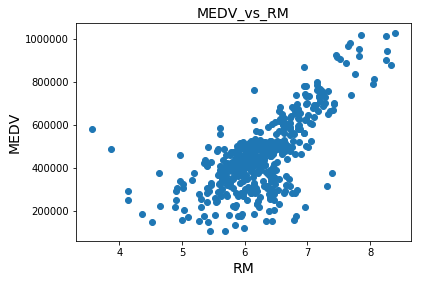

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
# plt.plot(full_data['RM'], full_data['MEDV'])
# plt.show()

#给各轴加标题
plt.title('MEDV_vs_RM', fontsize=14)
plt.xlabel('RM', fontsize=14)
plt.ylabel('MEDV', fontsize=14)

plt.scatter(full_data['RM'], full_data['MEDV'])
plt.show()  

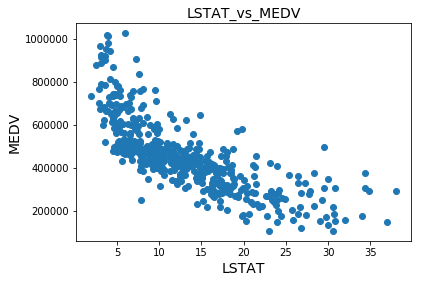

In [7]:
plt.title('LSTAT_vs_MEDV', fontsize=14)
plt.xlabel('LSTAT', fontsize=14)
plt.ylabel('MEDV', fontsize=14)
plt.scatter(full_data['LSTAT'],full_data['MEDV'])
plt.show()

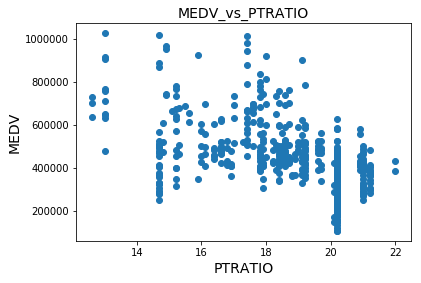

In [8]:
plt.title('MEDV_vs_PTRATIO', fontsize=14)
plt.xlabel('PTRATIO', fontsize=14)
plt.ylabel('MEDV', fontsize=14)
plt.scatter(full_data['PTRATIO'],full_data['MEDV'])
plt.show()

### 问题 1 - 回答：
按照散点图趋势分布，可以看出房屋平均数量RM越大则房屋价值MEDV越高，RM7的房屋一般来将比RM6的房屋价值更高。
低收入人群比例越低LSTAT，MEDV越高。
学生/教师比例与房价之间前期关系并不是很明显，但是房价高的地方每个老师负责的学生相对较少，而房价低的地区每个老师所负责的学生相对较多，都是大班。

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；

In [9]:
# TODO 2
from sklearn.model_selection import train_test_split

# 随机抽取20%的测试集
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=40)

print len(X_train), len(X_test)


391 98


### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

###  回答:
a.可以用测试集回测算法的学习情况和性能，可以用来评估模型。
b.如果用已见过的数据进行测试，那么准确率必然很高。如果没有数据对模型进行测试，就没有办法验证模型，也难以发现过拟合或欠拟合现象。

---
## 第三步. 模型衡量标准
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

或 

- (可选) 不使用任何外部库，参考[决定系数的定义](https://en.wikipedia.org/wiki/Coefficient_of_determination)进行计算，这也可以帮助你更好的理解决定系数在什么情况下等于0或等于1。

In [10]:
# TODO 3

# 提示： 导入r2_score
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    score = r2_score(y_true, y_predict)
    return score   

In [11]:
# TODO 3 可选

# 不允许导入任何计算决定系数的库

def performance_metric2(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    y = float(sum(y_true))/len(y_true)
    t1 = [(each-y)*(each-y) for each in y_true]
    s1 = sum(t1)

    t2 = [(a-b)*(a-b) for a,b in zip(y_true, y_predict)]
    s2 = sum(t2)

    score = 1 - float(s2)/s1

    return score

### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [12]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:
该模型基本可以正确的描述目标量的变化，因为决定系数=0.923

---
## 第四步. 分析模型的表现
在项目的第四步，我们来看一下不同参数下，模型在训练集和验证集上的表现。这里，我们专注于一个特定的算法（带剪枝的决策树，但这并不是这个项目的重点），和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益，这可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观得显示了随着训练数据量的增加，模型学习曲线的在训练集评分和验证集评分的变化，评分使用决定系数R<sup>2</sup>。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

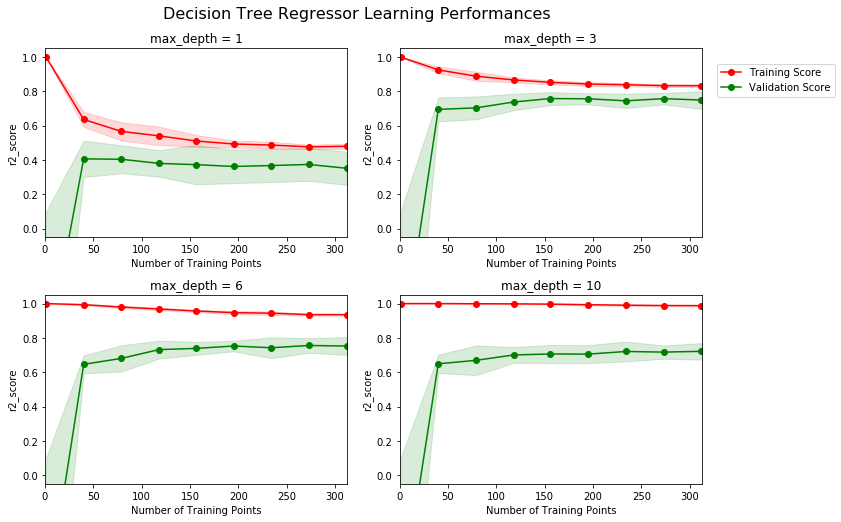

In [13]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)

### 问题 4 - 学习曲线
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练集曲线的评分有怎样的变化？验证集曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*

**提示：**学习曲线的评分是否最终会收敛到特定的值？

### 问题 4 - 回答:
训练集的曲线评分随着训练的增加逐步趋于平缓，验证集曲线也会逐渐趋近于训练集曲线，逐步收敛趋于平缓。当曲线达到一定收敛程度和稳定程度时，继续增加训练集不会提升模型表现。

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

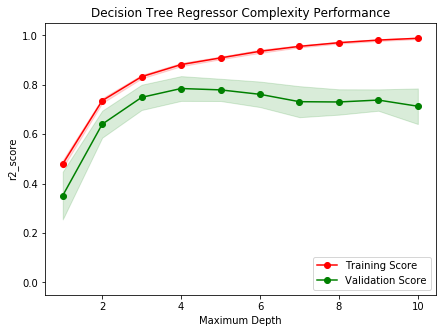

In [14]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

### 问题 5 - 偏差（bias）与方差（variance）之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

### 问题 5 - 回答:
### 个人笔记 
参考链接（https://www.zhihu.com/question/27068705）
偏差（bias）：描述的是根据样本拟合出的模型的输出预测结果与实际结果的差距，简单讲就是在样本上拟合的好不好。要想在偏差上表现的好low bias，就要复杂化模型，增加模型的参数。但是这样容易过拟合overfiting,过拟合对应的就是大方差high variance。
方差（variance）：描述的是在样本上训练出来的模型在测试集上的表现。想要表现的好low variance，就要简化模型减少模型的参数。但是这样容易欠拟合high bias，偏离实际结果。

- 以最大深度为1训练时，r2分数比较低，模型的预测出现了较大的偏差，说明属于欠拟合。
- 以最大深度为10训练时，训练集和测试集出现的分数相差较大，即较大的方差。图像中，随着深度的增加，红色和绿色线条之间的距离越来越大。


### 问题 6- 最优模型的猜测
*结合问题 5 中的图，你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？你得出这个答案的依据是什么？*

### 回答:
深度为3-4的时候可以更好地预测，因为在3-4的时候偏差和方差都趋近于最小，可以保证预测结果既不偏离实际又不会太分散。

---
## 第五步. 选择最优参数

### 个人笔记：网格搜索法和K折交叉验证

网格搜索算法是一种通过遍历给定的参数组合来优化模型表现的方法。

以决策树为例，当我们确定了要使用决策树算法的时候，为了能够更好地拟合和预测，我们需要调整它的参数。在决策树算法中，我们通常选择的参数是决策树的最大深度。

于是我们会给出一系列的最大深度的值，比如 {'max_depth': [1,2,3,4,5]}，我们会尽可能包含最优最大深度。

不过，我们如何知道哪一个最大深度的模型是最好的呢？我们需要一种可靠的评分方法，对每个最大深度的决策树模型都进行评分，这其中非常经典的一种方法就是交叉验证，下面我们就以K折交叉验证为例，详细介绍它的算法过程。



首先我们先看一下数据集是如何分割的。我们拿到的原始数据集首先会按照一定的比例划分成训练集和测试集。比如下图，以8:2分割的数据集：


训练集用来训练我们的模型，它的作用就像我们平时做的练习题；测试集用来评估我们训练好的模型表现如何，它的作用像我们做的高考题，这是要绝对保密不能提前被模型看到的。

因此，在K折交叉验证中，我们用到的数据是训练集中的所有数据。我们将训练集的所有数据平均划分成K份（通常选择K=10），取第K份作为验证集，它的作用就像我们用来估计高考分数的模拟题，余下的K-1份作为交叉验证的训练集。



对于我们最开始选择的决策树的5个最大深度 ，以 max_depth=1 为例，我们先用第2-10份数据作为训练集训练模型，用第1份数据作为验证集对这次训练的模型进行评分，得到第一个分数；然后重新构建一个 max_depth=1 的决策树，用第1和3-10份数据作为训练集训练模型，用第2份数据作为验证集对这次训练的模型进行评分，得到第二个分数……以此类推，最后构建一个 max_depth=1 的决策树用第1-9份数据作为训练集训练模型，用第10份数据作为验证集对这次训练的模型进行评分，得到第十个分数。于是对于 max_depth=1 的决策树模型，我们训练了10次，验证了10次，得到了10个验证分数，然后计算这10个验证分数的平均分数，就是 max_depth=1 的决策树模型的最终验证分数。


对于 max_depth = 2,3,4,5 时，分别进行和 max_depth=1 相同的交叉验证过程，得到它们的最终验证分数。然后我们就可以对这5个最大深度的决策树的最终验证分数进行比较，分数最高的那一个就是最优最大深度，我们利用最优参数在全部训练集上训练一个新的模型，整个模型就是最优模型。

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化模型？*

### 问题 7 - 回答:
- 网格搜索算法是一种通过遍历给定的参数组合来优化模型表现的算法,指定参数值进行穷举搜索。

- 将各个参数可能的取值进行排列组合，列出所有可能的组合结果生成“网格”。然后将各组合用于SVM训练，并使用交叉验证对表现进行评估。在拟合函数尝试了所有的参数组合后，返回一个合适的分类器，自动调整至最佳参数组合，对每一组数据进行跟踪评分，选择评分最高的组，作为最优解。


### 问题 8 - 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索时如果不使用交叉验证会有什么问题？交叉验证又是如何解决这个问题的？

**提示：** 在下面 fit_model函数最后加入 `print pd.DataFrame(grid.cv_results_)` 可以帮你查看更多信息。

### 问题 8 - 回答：
- K折交叉验证法是将训练集中的数据分成k分（一般取k=10），取第k份作为验证集，其他所有k-1份作为训练集，用第k份数据来评分。可以用来预测模型性能。
- GridSearchCV根据你给定的模型自动进行交叉验证，通过调节每一个参数来跟踪评分结果，实际上，该过程代替了进行参数搜索时的for循环过程.在尝试所有组合后，对每组数据进行跟踪评分，从而选择一组最佳参数组合作为最优解。而其通过调节其cv参数来实现与较差验证来实现最佳参数的选择，best_params_属性查看最优解。
- 交叉验证的结果。
- 网格搜索不使用交叉验证，使训练速度更快，但是难以找到到最优的模型参数；交叉验证对每一个参数组合得出的评分更为准确和鲁棒，提高评估的稳定性。

### 编程练习 4：训练最优模型
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：
1. **定义 `'cross_validator'` 变量**: 使用 `sklearn.model_selection` 中的 [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) 创建一个交叉验证生成器对象;
2. **定义 `'regressor'` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
3. **定义 `'params'` 变量**: 为 `'max_depth'` 参数创造一个字典，它的值是从1至10的数组;
4. **定义 `'scoring_fnc'` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
 将 `‘performance_metric’` 作为参数传至这个函数中；
5. **定义 `'grid'` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`'regressor'`, `'params'`, `'scoring_fnc'`和 `'cross_validator'` 作为参数传至这个对象构造函数中；
  
如果你对python函数的默认参数定义和传递不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [15]:
# TODO 4

#提示: 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV' 

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    cross_validator = KFold(10)
    
    regressor = DecisionTreeRegressor (random_state = 10)

    params = {"max_depth":range(1,11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    # print pd.DataFrame(grid.cv_results_)
    # 返回网格搜索后的最优模型
    return grid.best_estimator_


### 编程练习 4：训练最优模型 （可选）
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：

- 遍历参数`‘max_depth’`的可选值 1～10，构造对应模型
- 计算当前模型的交叉验证分数
- 返回最优交叉验证分数对应的模型

In [16]:
# TODO 4 可选？？？？？希望知道正确做法？？？？

'''
不允许使用 DecisionTreeRegressor 以外的任何 sklearn 库

提示: 你可能需要实现下面的 cross_val_score 函数
'''
from sklearn.tree import DecisionTreeRegressor

def cross_val_score(estimator, X, y, scoring = performance_metric, cv=3):
    #返回每组交叉验证的模型分数的数组
    scores = [0,0,0]
    return scores


def fit_model2(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    #最优交叉验证分数对应的最优模型
    best_estimator = None
    
    return best_estimator

### 问题 9 - 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [18]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### 问题 9 - 回答：
与猜测基本一致，深度为4

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [19]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $219,961.54
Predicted selling price for Client 3's home: $921,900.00


### 问题 10 - 回答：
- 建议客户1房屋售价： 411,096.00
- 建议客户2房屋售价： 219,961.00
- 建议客户3房屋售价： 921,900.00
- 根据当地整体房价价格，这三套房型都在合理售价范围内，并且根据其分布地区的不同贫富情况定价比较符合实际。

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [20]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, optimal_reg, performance_metric
# 提示：你可能需要参考问题10的代码进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted = optimal_reg.predict(X_test)
# 计算这个模型的预测结果的决定系数
r2 = performance_metric(y_test,predicted)


print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

Optimal model has R^2 score 0.80 on test data


### 问题11 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？

### 问题11 - 回答
有0.8的可能性，说明比较准确。

### 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。

### 问题 12 - 模型健壮性

模型是否足够健壮来保证预测的一致性？

**提示**: 执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [21]:
# 请先注释掉 fit_model 函数里的所有 print 语句
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $423,300.00
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $32,116.67


### 问题 12 - 回答：
基本每次预测的结果都在400万左右差距不大，因此可以说该模型比较健壮

### 问题 13 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

提示：回答以下几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在已考虑通货膨胀的前提下，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*
- *你觉得仅仅凭房屋所在社区的环境来判断房屋价值合理吗？*

### 问题 13 - 回答：
- 由于时间过于久远，基本不适用于今天。
- 不能，房子新旧程度 装修精简程度也会对房价有影响。
- 不能，每个地区有每个地区不同的特点，消费能力 教育水平 薪资等级等都不同。
- 不合理，理由同问题二

## 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中 `bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用网格搜索配合交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [39]:
# TODO 6
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import sys
import sklearn
import visuals as vs # Supplementary code


# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

# 让结果在notebook中显示
%matplotlib inline

# 载入北京房屋的数据集
data1 = pd.read_csv('bj_housing.csv')
Area = data1['Area']
Value = data1['Value']
Room = data1['Room']
Living = data1['Living']
School = data1['School']
Year = data1['Year']
Floor = data1['Floor']
features1 = data1.drop('Area', axis = 1)
    
# 完成
print "BeiJing housing dataset has {} data points with {} variables each.".format(*data1.shape)

BeiJing housing dataset has 9999 data points with 7 variables each.


In [41]:
#找到并查看要用的数据
Ex_file = 'bj_housing.csv'
full_data = pd.read_csv(Ex_file)
display (full_data.head())

#将要用的数据提取出来
outcomes_Value = full_data['Value']
display (outcomes_Value.head())

,Area,Value,Room,Living,School,Year,Floor
0,128,370,3,1,1,2004,21
1,68,330,1,2,1,2000,6
2,125,355,3,2,0,2003,5
3,129,278,2,2,0,2005,16
4,118,340,3,2,0,2003,6


0    370
1    330
2    355
3    278
4    340
Name: Value, dtype: int64

In [42]:
minimum_price = outcomes_Value.min()
maximum_price = outcomes_Value.max()
mean_price = outcomes_Value.mean()
median_price = outcomes_Value.median()
std_price = outcomes_Value.std()

print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $66.00
Maximum price: $7,450.00
Mean price: $342.08
Median price $280.00
Standard deviation of prices: $259.41


In [46]:
from sklearn.model_selection import train_test_split

# 随机抽取20%的测试集
X1_train, X1_test, y1_train, y1_test = train_test_split(features1, Value, test_size=0.2, random_state=40)

print len(X1_train), len(X1_test)


7999 2000


0.9228556485355649


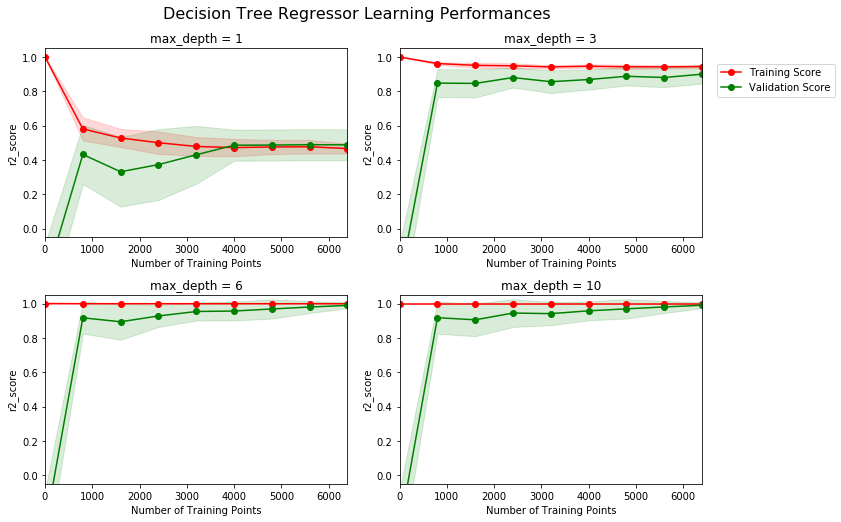

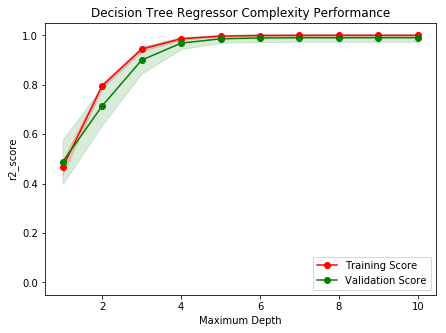

In [51]:
def performance_metric2(yb_true, yb_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    yb = float(sum(yb_true))/len(yb_true)
    tb1 = [(each-yb)*(each-yb) for each in yb_true]
    sb1 = sum(tb1)

    tb2 = [(a-b)*(a-b) for a,b in zip(yb_true, yb_predict)]
    sb2 = sum(tb2)

    score = 1 - float(sb2)/sb1

    return score
print score

# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X1_train, y1_train)

# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X1_train, y1_train)

In [58]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, yb):
    
    """ 基于输入数据 [X,yb]，利于网格搜索找到最优的决策树模型"""
    cross_validator = KFold(10)
    
    regressor = DecisionTreeRegressor (random_state = 10)

    params = {"max_depth":range(1,11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cross_validator)

    # 基于输入数据 [X,yb]，进行网格搜索
    grid = grid.fit(X, yb)
    # print pd.DataFrame(grid.cv_results_)
    # 返回网格搜索后的最优模型
    return grid.best_estimator_


# 基于训练数据，获得最优模型
optimal_reg = fit_model(X1_train, y1_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 10 for the optimal model.


### 问题14 - 北京房价预测
你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**提示：**如果你是从零开始构建机器学习的代码会让你一时觉得无从下手。这时不要着急，你要做的只是查看之前写的代码，把每一行都看明白，然后逐步构建你的模型。当中遇到什么问题也可以在我们论坛寻找答案。也许你会发现你所构建的模型的表现并没有达到你的预期，这说明机器学习并非是一项简单的任务，构建一个表现良好的模型需要长时间的研究和测试。这也是我们接下来的课程中会逐渐学到的。

### 问题14 - 回答
已经利用新数据构建模型，深度为10的时候为最优，最终方差和偏差都很小，说明北京房价差距明显。